In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
     


data=pd.read_csv("IMDb Movies India.csv",encoding='ISO-8859-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Model 1

In [3]:
input1=data.drop(['Name','Year','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1)
input1

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109 min,7.0,8
2,90 min,NaN,NaN
3,110 min,4.4,35
4,105 min,NaN,NaN
...,...,...,...
15504,NaN,4.6,11
15505,129 min,4.5,655
15506,NaN,NaN,NaN
15507,NaN,NaN,NaN


In [5]:
input1.isnull().sum()

Duration    8269
Rating      7590
Votes       7589
dtype: int64

In [6]:

input1.dropna(subset=['Duration','Votes','Rating'], inplace=True)
input1['Duration']=input1['Duration'].str.replace(' min', '')

In [7]:
input1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  5851 non-null   object 
 1   Rating    5851 non-null   float64
 2   Votes     5851 non-null   object 
dtypes: float64(1), object(2)
memory usage: 182.8+ KB


In [8]:
x=input1.drop(['Rating'], axis=1)
y=input1['Rating']
x


,Duration,Votes
1,109,8
3,110,35
5,147,827
6,142,"1,086"
8,82,326
...,...,...
15493,115,408
15494,153,"1,496"
15503,125,44
15505,129,655


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

x['Votes'] = x['Votes'].astype(str).str.replace(',', '').astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=22)

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


model = LinearRegression()
model.fit(x_train_scaled, y_train)


y_pred = model.predict(x_test_scaled)

In [11]:
y_pred_rounded = y_pred.round()
y_test_rounded = y_test.round()

# Ensure that predictions are within the valid rating range (e.g., 0 to 10 for IMDb ratings)

y_pred_rounded = y_pred_rounded.clip(min=0, max=10)

# Calculate the accuracy
accuracy = accuracy_score(y_test_rounded, y_pred_rounded)

accuracy

0.2886421861656704

In [12]:
coefficients = model.coef_
intercept = model.intercept_

# Display the linear regression equation
equation = f"Rating = {intercept:.4f} + {coefficients[0]:.4f} * Duration + {coefficients[1]:.4f} * Votes"
equation

'Rating = 5.9304 + -0.0688 * Duration + 0.1784 * Votes'

In [13]:
# Model 2: Based on Polynomial reg

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

degree = 3
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_pred_rounded = y_pred.round().clip(min=0, max=10)
y_test_rounded = y_test.round()
accuracy = accuracy_score(y_test_rounded, y_pred_rounded)

In [14]:
accuracy

0.2886421861656704

In [15]:
feature_names = poly.get_feature_names_out(input_features=['Duration', 'Votes'])

# Construct the polynomial regression equation
equation = f"Rating = {intercept:.4f}"
for coef, name in zip(coefficients, feature_names):
    equation += f" + ({coef:.4f} * {name})"

print(equation)

Rating = 5.9304 + (-0.0688 * 1) + (0.1784 * Duration)


In [16]:
# Model 3:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(x_test_scaled)


# Calculate accuracy for rounded predictions
y_pred_tree_rounded = y_pred_tree.round().clip(min=0, max=10)
y_test_rounded = y_test.round()
accuracy_tree = accuracy_score(y_test_rounded, y_pred_tree_rounded)

print(f'Accuracy: {accuracy_tree}')



Accuracy: 0.22117847993168233


In [17]:
# Clearly we need the other features as well in order to get the a decent predcition of rating


In [18]:
# Different approach to feature engineering
# We include the categorical columns of 'Director' , 'Actor 1' , 'Actor2' , 'Actor3'  by label encdoing them 


movie_data=data.copy()

# Pre=processing the data for forth coming feature transformations

movie_data.dropna(subset=["Rating"], inplace = True)


movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)


movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

movie_data['Duration'] = movie_data['Duration'].str.strip('min')

movie_data['Duration'].fillna(movie_data['Duration'].median(),inplace=True)

movie_data['Duration'] = movie_data['Duration'].astype(int)

movie_data['Year'] = movie_data['Year'].astype(int)


movie_data['Genre'] = movie_data['Genre'].str.split(',')

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = movie_data.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(movie_data['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(movie_data['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(movie_data['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


In [22]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)


     

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Duration   -0.001801
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64

In [30]:
column_list = sc_df.columns.tolist()

<Axes: >

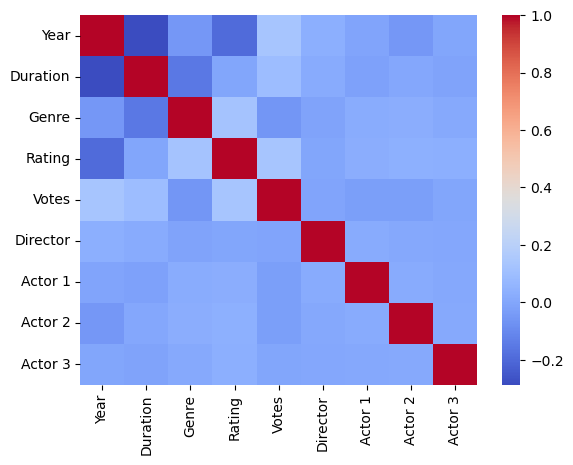

In [23]:
import seaborn as sns
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

In [ ]:
# Model 4: Again based on Linear regression

In [24]:
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

X_test = np.array(X_test)

y_pred = model.predict(X_test)
y_pred

C:\Users\karth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.38173569, 6.27438422, 6.24148256, ..., 5.6990634 , 6.25823896,
       6.09526622])

In [29]:
y_pred_rounded = y_pred.round().clip(min=0, max=10)
y_test_rounded = y_test.round()
print('accuracy score',accuracy_score(y_test_rounded,y_pred_rounded))

accuracy score 0.31261022927689597


In [33]:
column_list

['Year',
 'Duration',
 'Genre',
 'Rating',
 'Votes',
 'Director',
 'Actor 1',
 'Actor 2',
 'Actor 3']

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
original_feature_names = X.columns

intercept = model.intercept_
coefficients = model.coef_
feature_names = poly.get_feature_names_out(input_features=original_feature_names)



# Construct the polynomial regression equation
equation = f"Rating = {intercept:.4f}"
for coef, name in zip(coefficients, feature_names):
    equation += f" + ({coef:.4f} * {name})"

print(equation)

Rating = 36.3327 + (-0.0153 * 1) + (-0.0035 * Year) + (0.0013 * Duration) + (0.0000 * Genre) + (-0.0000 * Votes) + (0.0001 * Director) + (0.0001 * Actor 1) + (0.0000 * Actor 2)


In [41]:
# Model 5: Based on Decision Tree

from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()

model.fit(X_train,y_train)
X_test = np.array(X_test)

y_pred = model.predict(X_test)

y_pred_rounded = y_pred.round().clip(min=0, max=10)
y_test_rounded = y_test.round()
print('accuracy score',accuracy_score(y_test_rounded,y_pred_rounded))


accuracy score 0.291005291005291


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
